In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("HousingData.csv")

In [2]:
df.dropna(inplace=True)

In [3]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'MEDV']
y = df.loc[:, df.columns == 'MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [4]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [6]:
df.head(n=10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7


In [7]:
print(df.shape)

(394, 14)


In [8]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
df.fillna(0)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


In [12]:
correlation = df.corr()

<Axes: >

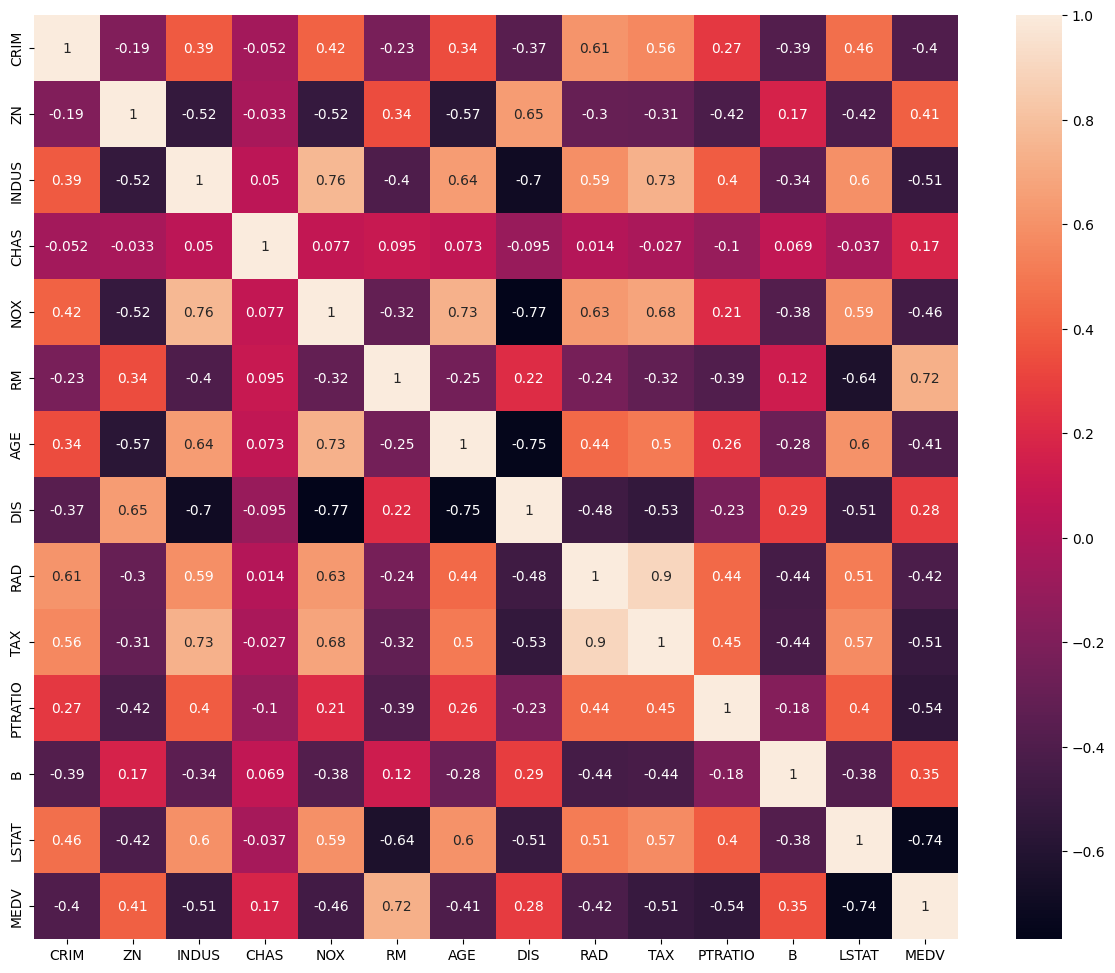

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,axes = plt.subplots(figsize=(15,12))
sns.heatmap(correlation,square = True,annot = True)

In [14]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#Fitting the model
regressor.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred = regressor.predict(X_test)
# Predicting RMSE the Test set results
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

4.979400761590822


In [17]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.7006451239701063


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
import keras
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential
model = Sequential()
model.add(Dense(128,activation = 'relu',input_dim =13))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(1))

In [20]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [21]:
model.compile(optimizer = 'adam',loss ='mean_squared_error',metrics=['mae'])

In [22]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05, verbose = 1)

Epoch 1/100
9/9 [==============================] - 1s 39ms/step - loss: 578.8574 - mae: 22.2304 - val_loss: 551.4615 - val_mae: 22.0575
Epoch 2/100
9/9 [==============================] - 0s 10ms/step - loss: 557.2949 - mae: 21.7577 - val_loss: 526.5360 - val_mae: 21.5099
Epoch 3/100
9/9 [==============================] - 0s 11ms/step - loss: 525.0959 - mae: 21.0473 - val_loss: 482.4118 - val_mae: 20.5170
Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 463.8586 - mae: 19.6459 - val_loss: 397.8425 - val_mae: 18.5005
Epoch 5/100
9/9 [==============================] - 0s 11ms/step - loss: 351.2032 - mae: 16.8085 - val_loss: 258.5041 - val_mae: 15.0310
Epoch 6/100
9/9 [==============================] - 0s 10ms/step - loss: 188.6969 - mae: 11.6633 - val_loss: 103.9833 - val_mae: 9.1579
Epoch 7/100
9/9 [==============================] - 0s 10ms/step - loss: 71.9258 - mae: 6.7642 - val_loss: 62.5749 - val_mae: 6.5160
Epoch 8/100
9/9 [==============================] - 0s

In [34]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['loss'],
name='Train'))
fig.add_trace(go.Scattergl(y=history.history['val_loss'],
name='Valid'))
fig.update_layout(height=500, width=700,
xaxis_title='Epoch',
yaxis_title='Loss')
import plotly.io as pio
pio.renderers.default = 'iframe'
fig.show()

In [35]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['mae'],
name='Train'))
fig.add_trace(go.Scattergl(y=history.history['val_mae'],
name='Valid'))
fig.update_layout(height=500, width=700,
xaxis_title='Epoch',
yaxis_title='Mean Absolute Error')
import plotly.io as pio
pio.renderers.default = 'iframe'
fig.show()

In [36]:
y_pred = model.predict(X_test)
mse_nn, mae_nn = model.evaluate(X_test, y_test)
print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

4/4 [==============================] - 0s 2ms/step - loss: 14.5063 - mae: 2.3638
Mean squared error on test data:  14.506278991699219
Mean absolute error on test data:  2.3637535572052


In [37]:
from sklearn.metrics import mean_absolute_error
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

In [38]:
print('Mean squared error on test data: ', mse_lr)
print('Mean absolute error on test data: ', mae_lr)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

Mean squared error on test data:  24.79443194453126
Mean absolute error on test data:  3.496750196569519
0.8248588537821022


In [39]:
# Predicting RMSE the Test set results
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

3.808710883674339


In [40]:
import sklearn
new_data = sklearn.preprocessing.StandardScaler().fit_transform(([[0.1, 10.0,
5.0, 0, 0.4, 6.0, 50, 6.0, 1, 400, 20, 300, 10]]))
prediction = model.predict(new_data)
print("Predicted house price:", prediction)

1/1 [==============================] - 0s 35ms/step
Predicted house price: [[9.813948]]


In [41]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)
print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

4/4 [==============================] - 0s 3ms/step - loss: 14.5063 - mae: 2.3638
Mean squared error on test data:  14.506278991699219
Mean absolute error on test data:  2.3637535572052
